In [1]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as s

In [4]:
df=pd.read_csv('popularity.csv')
df

url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
5       http://mashable.com/2013/01/07/beewi-smart-toys/       731.0   
6      http://mashable.com/2013/01/07/bodymedia-armba...       731.0   
7       http://mashable.com/2013/01/07/canon-poweshot-n/       731.0   
8      http://mashable.com/2013/01/07/car-of-the-futu...       731.0   
9      http://mashable.com/2013/01/07/chuck-hagel-web...       731.0   
10     http://mashable.com/2013/01/07/cosmic-events-d...       731.0   
11      http://mashable.com/2013/01/07/crayon-creatures/       731.0   
12         http://mashable.com/2013/01/07/creature-cups/       731.0   
13             http://mashable.com/2013/01/07/dad-jokes/       731.0   
14     http://mashable.com/2013/01/07/downton-abbey-t...       731.0   
15     http://mashable.com/2013/01/07/earth-size-plan...       731.0   
16             http://mashable.com/2013/01/07/echo-game/       731.0   
17     http://mashable.com/2013/01/07/entrepreneur-tr...       731.0   
18     http://mashable.com/2013/01/07/facebook-sick-app/       731.0   
19     http://mashable.com/2013/01/07/felt-audio-puls...       731.0   
20          http://mashable.com/2013/01/07/ford-glympse/       731.0   
21      http://mashable.com/2013/01/07/ftc-google-leaks/       731.0   
22     http://mashable.com/2013/01/07/fujifilm-50x-su...       731.0   
23     http://mashable.com/2013/01/07/hillary-clinton...       731.0   
24                http://mashable.com/2013/01/07/htc-q1/       731.0   
25     http://mashable.com/2013/01/07/huawei-ascend-m...       731.0   
26     http://mashable.com/2013/01/07/iheartradio-app...       731.0   
27     http://mashable.com/2013/01/07/intel-awesome-l...       731.0   
28     http://mashable.com/2013/01/07/isp02-iphone-ta...       731.0   
29        http://mashable.com/2013/01/07/jobs-contently/       731.0   
...                                                  ...         ...   
39614  http://mashable.com/2014/12/26/the-interview-i...         9.0   
39615  http://mashable.com/2014/12/26/toothpaste-fluo...         9.0   
39616  http://mashable.com/2014/12/26/top-photography...         9.0   
39617  http://mashable.com/2014/12/26/tor-attacked-li...         9.0   
39618  http://mashable.com/2014/12/26/tsa-gift-wrap-r...         9.0   
39619  http://mashable.com/2014/12/26/tsunami-10-year...         9.0   
39620  http://mashable.com/2014/12/26/turkey-teen-ins...         9.0   
39621  http://mashable.com/2014/12/26/ukraine-prisone...         9.0   
39622  http://mashable.com/2014/12/26/wacky-kickstart...         9.0   
39623        http://mashable.com/2014/12/26/what-is-tor/         9.0   
39624  http://mashable.com/2014/12/27/air-asia-flight...         9.0   
39625  http://mashable.com/2014/12/27/als-ice-bucket-...         9.0   
39626  http://mashable.com/2014/12/27/christmas-tree-...         9.0   
39627  http://mashable.com/2014/12/27/extremist-leade...         9.0   
39628  http://mashable.com/2014/12/27/facebook-year-i...         9.0   
39629  http://mashable.com/2014/12/27/frozen-doll-prank/         9.0   
39630  http://mashable.com/2014/12/27/high-school-i-c...         9.0   
39631  http://mashable.com/2014/12/27/japan-elderly-d...         9.0   
39632  http://mashable.com/2014/12/27/las-vegas-new-y...         9.0   
39633  http://mashable.com/2014/12/27/lbj-adviser-sla...         9.0   
39634  http://mashable.com/2014/12/27/music-grid-outf...         9.0   
39635   http://mashable.com/2014/12/27/nike-marc-newson/         9.0   
39636  http://mashable.com/2014/12/27/north-korea-int...         8.0   
39637  http://mashable.com/2014/12/27/nypd-rafael-ram...         8.0   
39638  http://mashabl

In [5]:
df.shape

(39644, 61)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [7]:
df.drop('url',axis=1,inplace=True)

In [8]:
df

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0           731.0             12.0              219.0          0.663594   
1           731.0              9.0              255.0          0.604743   
2           731.0              9.0              211.0          0.575130   
3           731.0              9.0              531.0          0.503788   
4           731.0             13.0             1072.0          0.415646   
5           731.0             10.0              370.0          0.559889   
6           731.0              8.0              960.0          0.418163   
7           731.0             12.0              989.0          0.433574   
8           731.0             11.0               97.0          0.670103   
9           731.0             10.0              231.0          0.636364   
10          731.0              9.0             1248.0          0.490050   
11          731.0             10.0              187.0          0.666667   
12          731.0              9.0              274.0          0.609195   
13          731.0              9.0              285.0          0.744186   
14          731.0              8.0              259.0          0.562753   
15          731.0             12.0              682.0          0.459542   
16          731.0              8.0             1118.0          0.512397   
17          731.0              8.0              397.0          0.624679   
18          731.0             11.0              103.0          0.689320   
19          731.0              8.0             1207.0          0.410579   
20          731.0             13.0             1248.0          0.390638   
21          731.0              9.0              391.0          0.510256   
22          731.0             11.0             1154.0          0.427305   
23          731.0             11.0              125.0          0.674797   
24          731.0             13.0              244.0          0.560000   
25          731.0              8.0              266.0          0.572581   
26          731.0              8.0              331.0          0.562691   
27          731.0             12.0             1225.0          0.385452   
28          731.0             10.0              243.0          0.619247   
29          731.0             11.0              723.0          0.490934   
...           ...              ...                ...               ...   
39614         9.0              9.0              904.0          0.472158   
39615         9.0             11.0                0.0          0.000000   
39616         9.0             15.0                0.0          0.000000   
39617         9.0             11.0              991.0          0.459173   
39618         9.0             14.0              488.0          0.517454   
39619         9.0             14.0              428.0          0.512881   
39620         9.0             13.0              413.0          0.556675   
39621         9.0              9.0              468.0          0.582781   
39622         9.0             11.0             1122.0          0.439421   
39623         9.0             14.0              436.0          0.529412   
39624         9.0             12.0              429.0          0.514925   
39625         9.0             13.0              224.0          0.570136   
39626         9.0             12.0              249.0          0.567227   
39627         9.0             14.0              874.0          0.480702   
39628         9.0             14.0              626.0          0.552504   
39629         9.0             13.0              209.0          0.656863   
39630         9.0             12.0              491.0          0.454167   
39631         9.0             13.0              746.0          0.465306   
39632         9.0             15.0              580.0          0.506261   
39633         9.0              9.0              614.0          0.476033   
39634         9.0              9.0              251.0          0.666667   
39635         9.0             13.

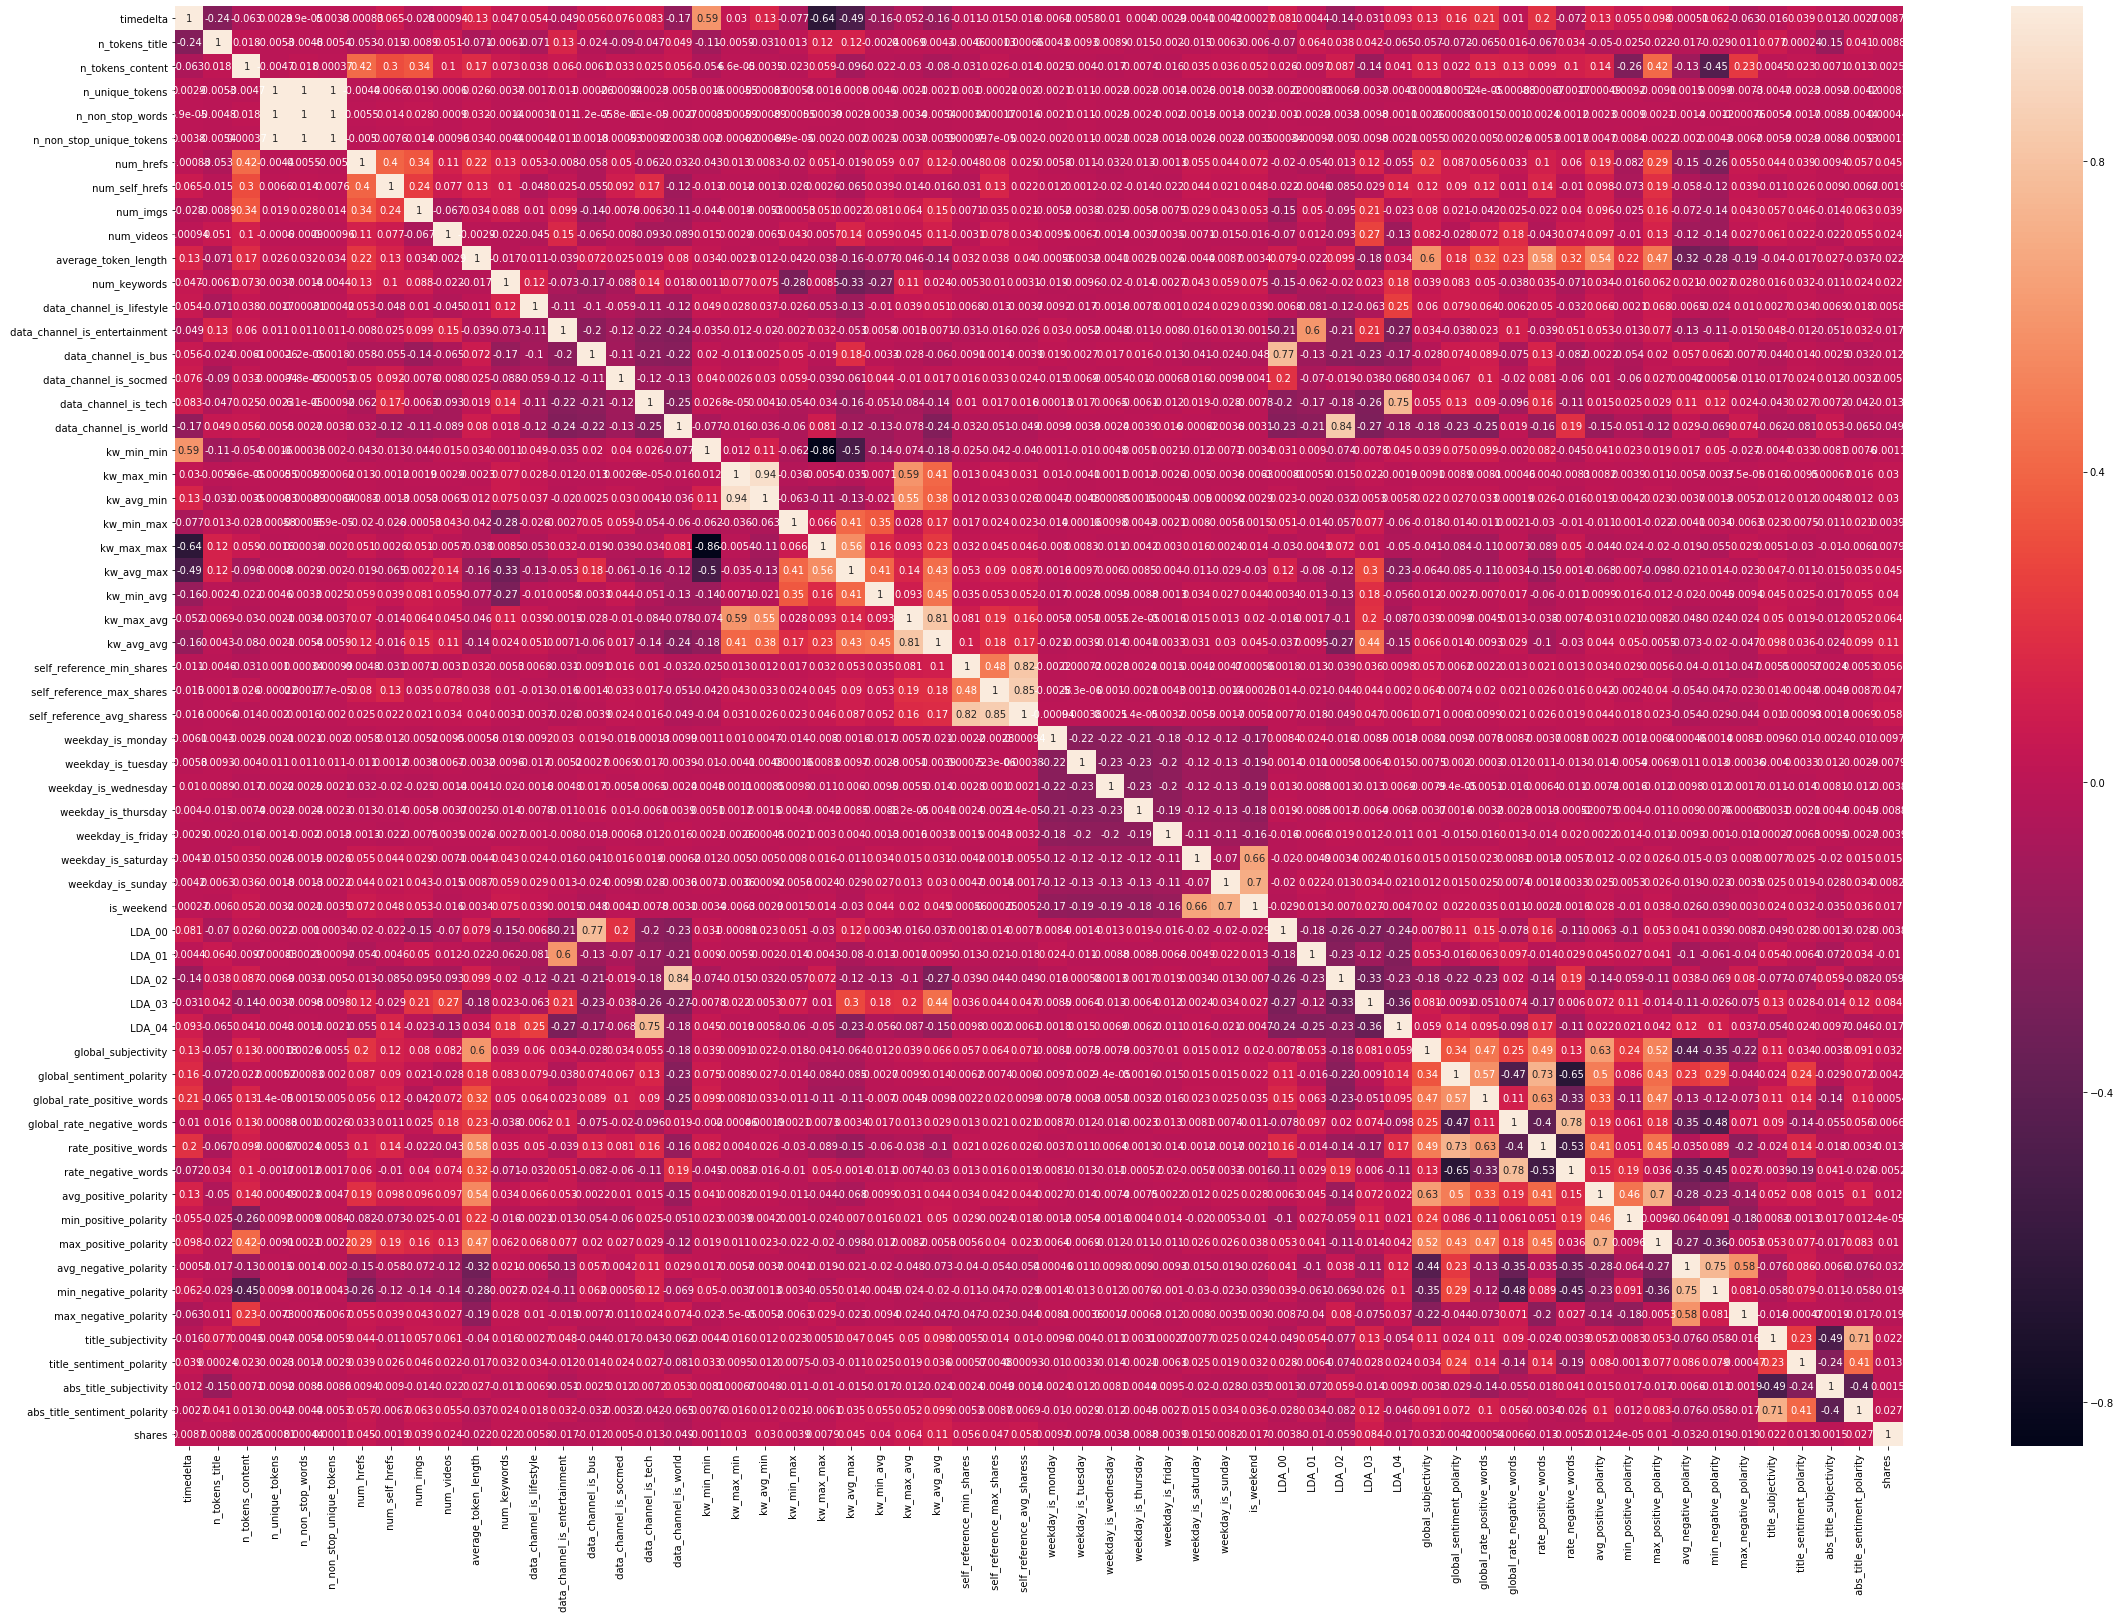

In [15]:
fig=plt.figure()
sns.heatmap(df.corr(),annot=True,ax=fig.add_axes([0,0,5,5]))

In [206]:
x=df.drop(' shares',axis=1)
y=df[[' shares']]

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [209]:
import statsmodels.api as sm

In [210]:
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()

In [211]:
lr.params

const                             -2476.461652
 timedelta                            2.180448
 n_tokens_title                     135.008962
 n_tokens_content                     0.922604
 n_unique_tokens                   3426.486149
 n_non_stop_words                 -1285.963602
 n_non_stop_unique_tokens         -1078.938499
 num_hrefs                           21.837214
 num_self_hrefs                     -72.990292
 num_imgs                            11.448502
 num_videos                          -5.287006
 average_token_length              -526.579138
 num_keywords                        80.099673
 data_channel_is_lifestyle         -600.439520
 data_channel_is_entertainment     -869.975202
 data_channel_is_bus               -422.865329
 data_channel_is_socmed            -345.319841
 data_channel_is_tech              -176.085902
 data_channel_is_world              -67.049391
 kw_min_min                           1.017066
 kw_max_min                           0.093419
 kw_avg_min  

In [212]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     11.27
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           4.92e-97
Time:                        12:44:19   Log-Likelihood:            -3.0088e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27693   BIC:                         6.023e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -2476.4617    789.067     -3.138      0.002   -4023.072    -929.851
 timedelta                         2.1804      0.507      4.305      0.000       1.188       3.173
 n_tokens_title                  135.0090     37.459      3.604      0.000      61.587     208.431
 n_tokens_content                  0.9226      0.288      3.204      0.001       0.358       1.487
 n_unique_tokens                3426.4861   2479.978      1.382      0.167   -1434.395    8287.367
 n_non_stop_words              -1285.9636   7365.670     -0.175      0.861   -1.57e+04    1.32e+04
 n_non_stop_unique_tokens      -1078.9385   2104.685     -0.513      0.608   -5204.225    3046.348
 num_hrefs                        21.8372      8.757      2.494      0.013       4.674      39.001
 num_self_hrefs                  -72.9903     23.724     -3.077      0.002    -119.490     -26.490
 num_imgs                         11.4485     11.396      1.005      0.315     -10.887      33.784
 num_videos                       -5.2870     20.134     -0.263      0.793     -44.751      34.177
 average_token_length           -526.5791    313.529     -1.680      0.093   -1141.112      87.953
 num_keywords                     80.0997     47.937      1.671      0.095     -13.859     174.058
 data_channel_is_lifestyle      -600.4395    512.111     -1.172      0.241   -1604.202     403.323
 data_channel_is_entertainment  -869.9752    329.104     -2.643      0.008   -1515.035    -224.916
 data_channel_is_bus            -422.8653    493.931     -0.856      0.392   -1390.995     545.265
 data_channel_is_socmed         -345.3198    484.001     -0.713      0.476   -1293.985     603.345
 data_channel_is_tech           -176.0859    481.003     -0.366      0.714   -1118.875     766.703
 data_channel_is_world           -67.0494    488.041     -0.137      0.891   -1023.634     889.535
 kw_min_min                        1.0171      2.096      0.485      0.628      -3.091       5.125
 kw_max_min                        0.0934      0.069      1.346      0.178      -0.043       0.229
 kw_avg_min                       -0.2990      0.450     -0.664      0.507      -1.182       0.584
 kw_min_max                       -0.0033      0.002     -2.132      0.033      -0.006      -0.000
 kw_max_max                       -0.0002      0.001     -0.299      0.765      -0.002       0.001
 kw_avg_max                        0.0005      0.001      0.487      0.626      -0.002       0.003
 kw_min_avg                       -0.3155      0.098     -3.223      0.001      -0.507      -0.124
 kw_max_avg                       -0.2070      0.033     -6.255      0.000      -0.272      -0.142
 kw_avg_avg                        1.6975      0.188      9.048      0.000       1.330       2.065
 self_referenc

In [213]:
a=dict(lr.pvalues>0.05)
a.pop('const')
d=[]
for i in a:
    if a[i]==True:
        d.append(i)
x=x_train.drop(d,1)


In [214]:
x_train_sm1=sm.add_constant(x)
lr1=sm.OLS(y_train,x_train_sm1).fit()

In [215]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     33.45
Date:                Sat, 07 Sep 2019   Prob (F-statistic):          9.05e-109
Time:                        12:44:22   Log-Likelihood:            -3.0091e+05
No. Observations:               27750   AIC:                         6.019e+05
Df Residuals:                   27732   BIC:                         6.020e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -3844.8797    637.390     -6.032      0.000   -5094.196   -2595.564
 timedelta                         2.2882      0.382      5.996      0.000       1.540       3.036
 n_tokens_title                  145.5788     36.585      3.979      0.000      73.871     217.287
 n_tokens_content                  0.5645      0.182      3.103      0.002       0.208       0.921
 num_hrefs                        25.1148      8.052      3.119      0.002       9.333      40.897
 num_self_hrefs                  -66.1026     22.557     -2.930      0.003    -110.316     -21.889
 data_channel_is_entertainment  -612.3374    202.060     -3.030      0.002   -1008.385    -216.290
 kw_min_max                       -0.0036      0.001     -2.486      0.013      -0.006      -0.001
 kw_min_avg                       -0.3939      0.090     -4.355      0.000      -0.571      -0.217
 kw_max_avg                       -0.2123      0.026     -8.238      0.000      -0.263      -0.162
 kw_avg_avg                        1.9349      0.141     13.696      0.000       1.658       2.212
 self_reference_min_shares         0.0252      0.004      5.902      0.000       0.017       0.034
 self_reference_max_shares         0.0038      0.002      1.740      0.082      -0.000       0.008
 weekday_is_tuesday             -479.6534    202.629     -2.367      0.018    -876.816     -82.491
 weekday_is_thursday            -435.7767    203.997     -2.136      0.033    -835.620     -35.933
 weekday_is_friday              -381.7912    223.548     -1.708      0.088    -819.956      56.373
 LDA_02                         -581.6603    306.073     -1.900      0.057   -1181.578      18.258
 global_subjectivity            1154.8786    672.938      1.716      0.086    -164.113    2473.870
==============================================================================
Omnibus:                    77403.535   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4212871999.605
Skew:                          36.070   Prob(JB):                         0.00
Kurtosis:                    1910.449   Cond. No.                     6.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
lr1.rsquared

0.02009558118905852

In [217]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
9                       kw_avg_avg  31.58
1                   n_tokens_title  15.49
16             global_subjectivity  14.10
8                       kw_max_avg   7.20
7                       kw_min_avg   3.64
0                        timedelta   3.63
2                 n_tokens_content   3.08
3                        num_hrefs   2.82
4                   num_self_hrefs   2.26
15                          LDA_02   1.82
11       self_reference_max_shares   1.53
10       self_reference_min_shares   1.42
12              weekday_is_tuesday   1.37
13             weekday_is_thursday   1.37
5    data_channel_is_entertainment   1.32
14               weekday_is_friday   1.29
6                       kw_min_max   1.22